In [1]:
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

In [2]:
def get_treasury_data():
    # Definir los símbolos de los bonos del Tesoro que queremos
    symbols = ['^TNX', '^TYX']  # 10-year y 30-year Treasury yield

    # Definir el rango de fechas
    end_date = datetime.datetime.now()
    start_date = end_date - datetime.timedelta(days=365*5)  # 5 años de datos

    # Obtener los datos
    data = yf.download(symbols, start=start_date, end=end_date)

    # Limpiar y preparar los datos
    df = data['Adj Close'].reset_index()
    df.columns = ['Date', '10Y', '30Y']

    return df

In [3]:
treasury_data = get_treasury_data()
print(treasury_data.head())

[*********************100%***********************]  2 of 2 completed

                       Date    10Y    30Y
0 2019-11-25 00:00:00+00:00  1.764  2.207
1 2019-11-26 00:00:00+00:00  1.740  2.178
2 2019-11-27 00:00:00+00:00  1.767  2.193
3 2019-11-29 00:00:00+00:00  1.776  2.202
4 2019-12-02 00:00:00+00:00  1.836  2.285


In [4]:
def plot_yield_curve(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['10Y'], label='10-Year Treasury Yield')
    plt.plot(df['Date'], df['30Y'], label='30-Year Treasury Yield')
    plt.fill_between(df['Date'], df['10Y'], df['30Y'], where=(df['10Y'] > df['30Y']),
                     color='red', alpha=0.3, label='Yield Curve Inversion')

    plt.title('Treasury Yield Curve')
    plt.xlabel('Date')
    plt.ylabel('Yield (%)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


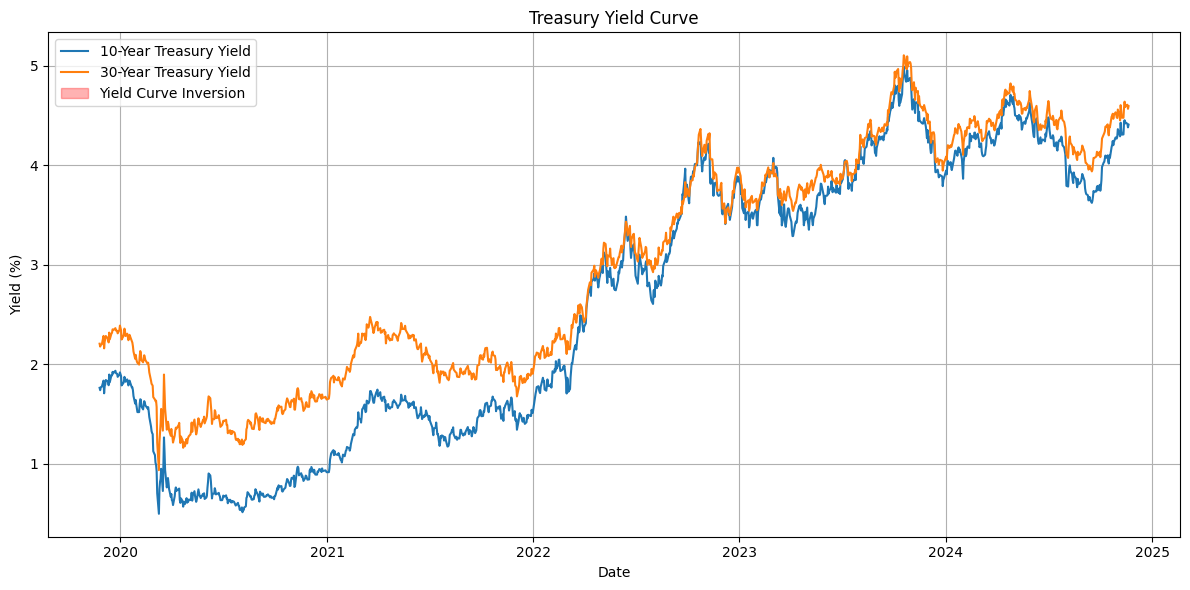

In [5]:

# Llamar a la función para visualizar los datos
plot_yield_curve(treasury_data)

In [6]:
def calculate_inversion(df):
    df['Inversion'] = df['10Y'] - df['30Y']
    return df

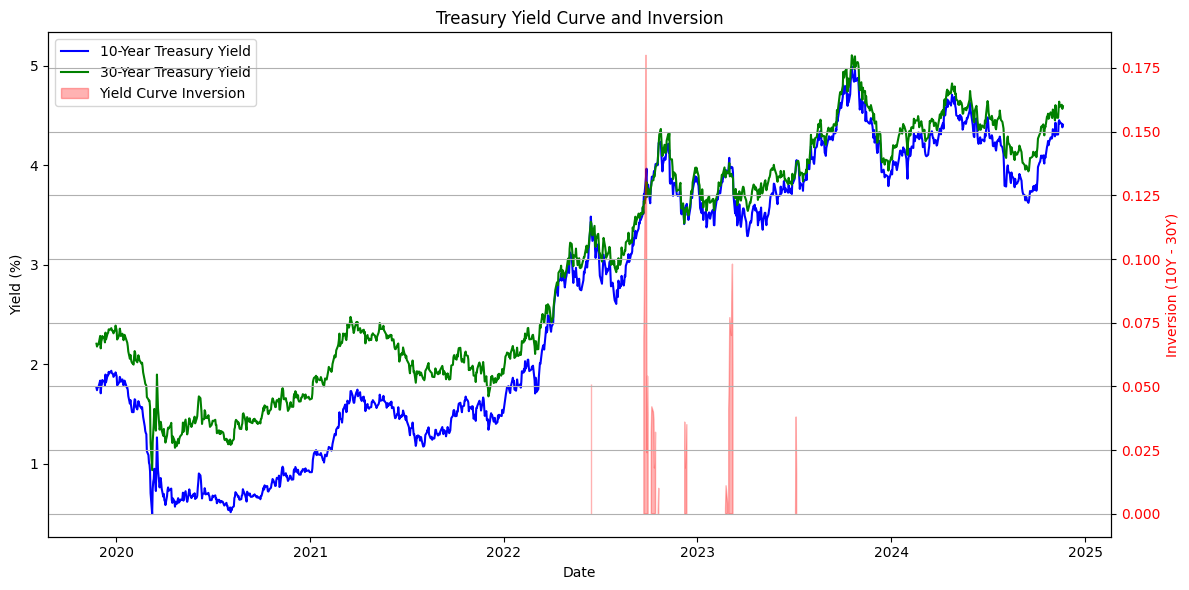

In [7]:
import matplotlib.dates as mdates

def plot_yield_curve_inversion(df):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Graficar los rendimientos
    ax1.plot(df['Date'], df['10Y'], label='10-Year Treasury Yield', color='blue')
    ax1.plot(df['Date'], df['30Y'], label='30-Year Treasury Yield', color='green')
    ax1.set_ylabel('Yield (%)', color='black')
    ax1.tick_params(axis='y', labelcolor='black')

    # Crear un segundo eje y para la inversión
    ax2 = ax1.twinx()
    ax2.fill_between(df['Date'], df['Inversion'], 0, where=(df['Inversion'] > 0),
                     color='red', alpha=0.3, label='Yield Curve Inversion')
    ax2.set_ylabel('Inversion (10Y - 30Y)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Configuración del gráfico
    plt.title('Treasury Yield Curve and Inversion')
    ax1.set_xlabel('Date')
    ax1.xaxis.set_major_locator(mdates.YearLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # Combinar leyendas de ambos ejes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Asumiendo que ya has calculado la inversión como en el ejemplo anterior
treasury_data = calculate_inversion(treasury_data)

# Llamar a la función para visualizar la inversión
plot_yield_curve_inversion(treasury_data)